In [43]:
import tensorflow as tf

list1=[1.,2.,3.,4.]
list2=[5.,6.,7.,8.]
result1=tf.reduce_mean(list1)
result2=tf.reduce_mean(list2)
sess=tf.Session()
print(sess.run(result1))
print(sess.run(result2))
#sess.close()

2.5
6.5


In [44]:
import pandas as pd

arr=tf.constant(list1)
list_df = pd.DataFrame(data=list1)

mean,var=tf.nn.moments(arr,[0])
sess=tf.Session()
m,v=sess.run([mean,var])
print(m,v)
#sess.close()

2.5 1.25


In [45]:
#sess=tf.Session()
sumation=0.0
for i in range(0,len(list1)):
    print(sess.run(tf.multiply(tf.subtract(list1[i],result1),tf.subtract(list2[i],result2))))
    sumation+=(list1[i]-result1)*(list2[i]-result2)
sumation=sumation/(len(list1)-1)
print(sess.run(sumation))
#c=tf.div(sumation,v)
#sess.run(c)
#tf.reset_default_graph()
with tf.name_scope("mc_value"):
    with tf.name_scope("m"):
        m=tf.div(sumation,v,name="divide")
    with tf.name_scope("c"):
        z=tf.multiply(m,result1,name="mul_1")
        r=tf.subtract(result2,z,name="diff")
with tf.Session() as sess:
    writer=tf.summary.FileWriter("/tmp/tboard/output6",sess.graph)
    print(sess.run(r))
    writer.close()
#sess.close()

2.25
0.25
0.25
2.25
1.66667
3.16667


In [24]:
tf.reset_default_graph()

In [41]:
sess2=tf.Session()
sess2.run(tf.div(sumation,v))

1.3333333

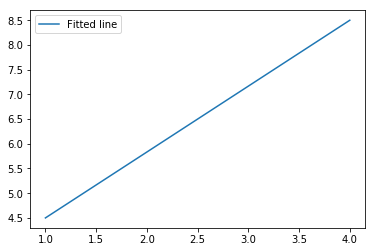

In [42]:
import matplotlib.pyplot as plt
import numpy as np
x_arr=np.array(list1)
y_arr=np.array(list2)

sess2=tf.Session()
plt.plot(x, sess2.run(m) * x + sess2.run(r), label='Fitted line')
plt.legend()
plt.show()


Epoch: 0050 cost= 0.695070863 W= 1.92173 b= 1.12283
Epoch: 0100 cost= 0.587778330 W= 1.89298 b= 1.34471
Epoch: 0150 cost= 0.505506516 W= 1.82871 b= 1.53763
Epoch: 0200 cost= 0.434785694 W= 1.76857 b= 1.71636
Epoch: 0250 cost= 0.373959541 W= 1.71279 b= 1.88212
Epoch: 0300 cost= 0.321642548 W= 1.66105 b= 2.03584
Epoch: 0350 cost= 0.276645362 W= 1.61307 b= 2.17841
Epoch: 0400 cost= 0.237942651 W= 1.56857 b= 2.31063
Epoch: 0450 cost= 0.204654306 W= 1.5273 b= 2.43325
Epoch: 0500 cost= 0.176023155 W= 1.48903 b= 2.54697
Epoch: 0550 cost= 0.151397586 W= 1.45353 b= 2.65244
Epoch: 0600 cost= 0.130217314 W= 1.42061 b= 2.75025
Epoch: 0650 cost= 0.112000041 W= 1.39008 b= 2.84096
Epoch: 0700 cost= 0.096331373 W= 1.36177 b= 2.92509
Epoch: 0750 cost= 0.082854562 W= 1.33551 b= 3.00311
Epoch: 0800 cost= 0.071263224 W= 1.31116 b= 3.07547
Epoch: 0850 cost= 0.061293393 W= 1.28857 b= 3.14258
Epoch: 0900 cost= 0.052718572 W= 1.26763 b= 3.20481
Epoch: 0950 cost= 0.045343272 W= 1.2482 b= 3.26253
Epoch: 1000 co

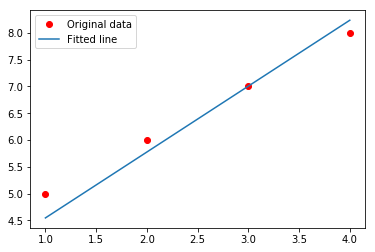

In [56]:

import numpy
import matplotlib.pyplot as plt
rng = numpy.random

learning_rate = 0.01
training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()